**Import Libraries and Data**

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_store_customer_data.csv to online_store_customer_data.csv


In [3]:
# Load dataset into a pandas DataFrame and display basic info
dt = pd.read_csv('online_store_customer_data.csv')
dt.head()  # Show the first few rows to understand the structure of the dataset
print(dt)

     Transaction_date  Transaction_ID  Gender   Age Marital_status  \
0            1/1/2019          151200  Female  19.0         Single   
1            1/1/2019          151201    Male  49.0         Single   
2            1/1/2019          151202    Male  63.0        Married   
3            1/1/2019          151203     NaN  18.0         Single   
4            1/1/2019          151204    Male  27.0         Single   
...               ...             ...     ...   ...            ...   
2507         5/1/2021          153695  Female  57.0         Single   
2508         5/1/2021          153696  Female  36.0        Married   
2509         5/1/2021          153697    Male  22.0         Single   
2510         5/1/2021          153698     NaN  44.0         Single   
2511         5/1/2021          153699    Male  48.0         Single   

         State_names   Segment Employees_status Payment_method  Referal  \
0             Kansas     Basic     Unemployment          Other      1.0   
1        

In [4]:
# Check the shape of the dataset (number of rows and columns)
dt.shape

(2512, 11)

**Identify Missing Value in The Dataset​**

 **Calculate Missing Value​**

In [5]:
# Calculate the number of missing values in each column
missing_counts = dt.isna().sum()
print(missing_counts)

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64


<Axes: >

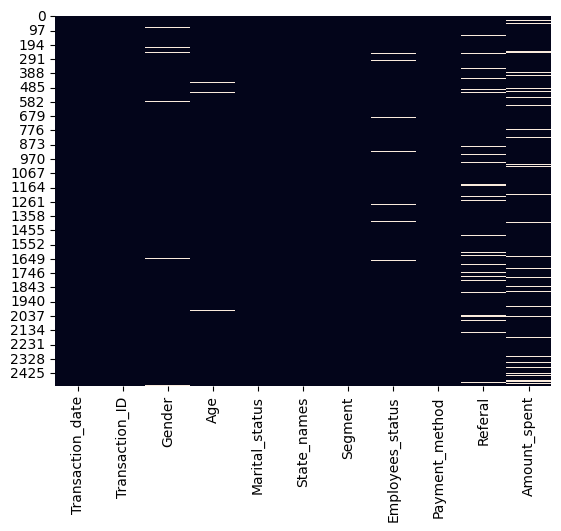

In [6]:
# Visualize missing data using a heatmap for quick inspection
import seaborn as sns
sns.heatmap(dt.isnull(), cbar=False)

**Remove or Exclude Missing Value​**

In [7]:
# Drop rows where the 'Amount_spent' column has missing values
dt2 = dt.dropna(subset=['Amount_spent'])

In [8]:
# Recalculate missing values after dropping rows with missing 'Amount_spent'
missing_counts = dt2.isna().sum()
print(missing_counts)

Transaction_date      0
Transaction_ID        0
Gender               26
Age                  39
Marital_status        0
State_names           0
Segment               0
Employees_status     25
Payment_method        0
Referal             142
Amount_spent          0
dtype: int64


In [9]:
# Drop rows where any column contains missing values
dt3 = dt.dropna()

In [10]:
# Recalculate missing values after dropping all rows with any missing values
missing_counts = dt3.isna().sum()
print(missing_counts)

Transaction_date    0
Transaction_ID      0
Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64


In [11]:
# Check the shape of the dataset after removing rows with missing values
dt3.shape

(2044, 11)

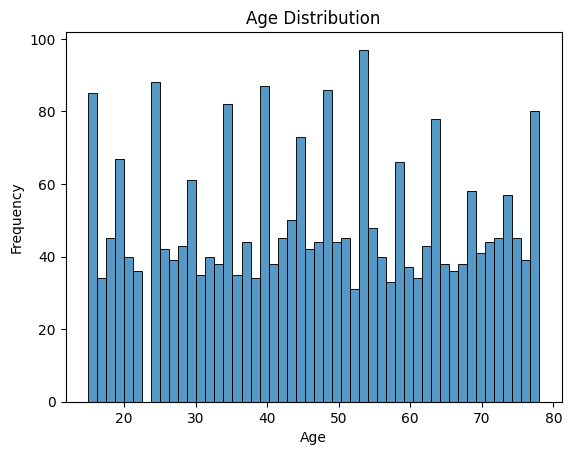

In [12]:
# Plot a histogram of the 'Age' column to check its distribution
import matplotlib.pyplot as plt
sns.histplot(dt['Age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

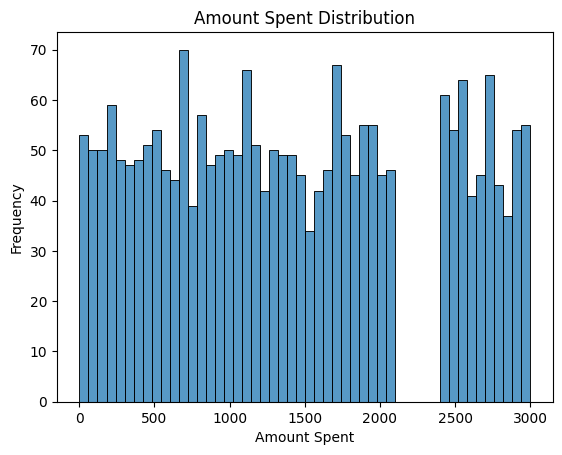

In [13]:
# Plot a histogram of the 'Amount_spent' column to check its distribution
sns.histplot(dt['Amount_spent'], bins=50)
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.title('Amount Spent Distribution')
plt.show()

In [14]:
# Test for normality of the 'Amount_spent' data using Shapiro-Wilk Test
import scipy.stats as stats
import numpy as np

statistic, p_value = stats.shapiro(dt['Amount_spent'])
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the result of the Shapiro-Wilk test
alpha = 0.05  # Significance level
if p_value > alpha:
    print("Cannot reject the null hypothesis (data is normally distributed)")
else:
    print("Reject the null hypothesis (data is not normally distributed)")

Statistic: nan
P-value: nan
Reject the null hypothesis (data is not normally distributed)


In [15]:
# Test for normality of the 'Age' data using Shapiro-Wilk Test
statistic, p_value = stats.shapiro(dt['Age'])
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the result of the Shapiro-Wilk test for 'Age'
if p_value > alpha:
    print("Cannot reject the null hypothesis (data is normally distributed)")
else:
    print("Reject the null hypothesis (data is not normally distributed)")

Statistic: nan
P-value: nan
Reject the null hypothesis (data is not normally distributed)


**Recode and Imputate Missing Value​**



*   Mean




In [16]:
# Imputation strategy 1: Fill missing 'Age' values with the mean
mean_age = dt['Age'].mean()
print(f"Mean Age: {mean_age}")

Mean Age: 46.63765182186235


In [17]:
# Check the number of missing 'Age' values before imputation
dt['Age'].isna().sum()

42

In [18]:
# Fill missing values in 'Age' column with the mean
dt['Age'].fillna(mean_age, inplace=True)

<ipython-input-18-6ce63a7ab2c3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Age'].fillna(mean_age, inplace=True)


In [19]:
# Confirm no missing values remain in 'Age' column
dt['Age'].isna().sum()

0



*   Median



In [20]:
# Calculate the median for 'Amount_spent' and fill missing values with it
median_amount_spend = dt['Amount_spent'].median()
print(f"Median Amount Spent: {median_amount_spend}")

Median Amount Spent: 1341.435


In [21]:
# Check the number of missing 'Amount_spent' values before imputation
dt['Amount_spent'].isna().sum()

242

In [22]:
# Impute missing 'Amount_spent' values with the median
dt['Amount_spent'].fillna(median_amount_spend, inplace=True)

<ipython-input-22-1161cd16d5c5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Amount_spent'].fillna(median_amount_spend, inplace=True)


In [23]:
# Verify no missing values remain in 'Amount_spent' column
dt['Amount_spent'].isna().sum()

0



*   Mode



In [24]:
# Convert 'Employees_status' to categorical data and impute missing values using the mode
dt['Employees_status'] = dt['Employees_status'].astype('category')

# Calculate and print the mode for 'Employees_status'
mode_employees = dt['Employees_status'].mode()[0]  # Mode returns a Series, so we select the first value
print(f"Mode for Employees Status: {mode_employees}")

Mode for Employees Status: Employees


In [25]:
# Check the number of missing 'Employees_status' values before imputation
dt['Employees_status'].isna().sum()

26

In [26]:
# Impute missing values in 'Employees_status' with the mode
dt['Employees_status'].fillna(mode_employees, inplace=True)

<ipython-input-26-a23d44753bd5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Employees_status'].fillna(mode_employees, inplace=True)


In [27]:
# Verify no missing values remain in 'Employees_status' column
dt['Employees_status'].isna().sum()

0

In [28]:
# Display the updated dataset
print(dt)

     Transaction_date  Transaction_ID  Gender   Age Marital_status  \
0            1/1/2019          151200  Female  19.0         Single   
1            1/1/2019          151201    Male  49.0         Single   
2            1/1/2019          151202    Male  63.0        Married   
3            1/1/2019          151203     NaN  18.0         Single   
4            1/1/2019          151204    Male  27.0         Single   
...               ...             ...     ...   ...            ...   
2507         5/1/2021          153695  Female  57.0         Single   
2508         5/1/2021          153696  Female  36.0        Married   
2509         5/1/2021          153697    Male  22.0         Single   
2510         5/1/2021          153698     NaN  44.0         Single   
2511         5/1/2021          153699    Male  48.0         Single   

         State_names   Segment Employees_status Payment_method  Referal  \
0             Kansas     Basic     Unemployment          Other      1.0   
1        